# Data Preparation for Gauss Hermite kinematics

This notebook shows how to prepare input kinematic data files from Gauss-Hermite files from the CALIFA and ATLAS-3D surveys.

## CALIFA 

Example galaxy NGC6278. A Schwarzschild model for this galaxy can be found in [Zhu et al](https://arxiv.org/pdf/1709.06649.pdf).

Galaxy: NGC6278
NGC6278_input/NGC6278.V1200.rscube_INDOUSv2_SN20_stellar_kin.fits
  Kin PA: 126.0  +/-   1.2  (3*sigma error)
Velocity Offset: -12.33
The pixel size is 1.0
PA: 126.0
Total bins: 152
Pixel grid dimension is  58.0 52.0
Vels plot: 197.20913252580198, 65.0832933754251, 218.18955410204666


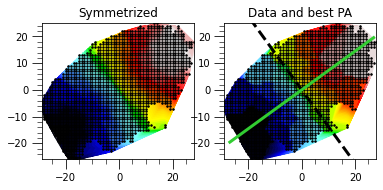

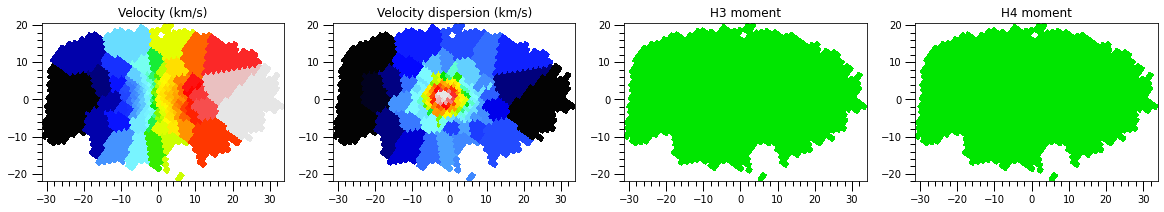

In [1]:
import os
import dynamite as dyn
from dynamite.data_prep.generate_kin_input import create_kin_input

in_dir = 'NGC6278_input/'

# we provide the CALIFA stellar kinematic file for NGC6278 here,
in_file = 'NGC6278_input/NGC6278.V1200.rscube_INDOUSv2_SN20_stellar_kin.fits'

# where to place the output
out_dir = 'NGC6278_input/dynamite_input/'

# convert file to ECSV, fit the kinematic PA, write aperture.dat and bins.dat
create_kin_input('NGC6278', in_file, out_dir, expr='', fit_PA=True, kin_input='CALIFA')

# add the PSF to the header of the kinematic file
gh = dyn.kinematics.GaussHermite()
gh.add_psf_to_datafile(sigma=[1.06],
                       weight=[1.0],
                       datafile=f'{out_dir}/gauss_hermite_kins.ecsv')


The directory `NGC6278_input/dynamite_input` should now contain the following files,

- mge.ecsv (was already present)
- gauss_hermite_kins.ecsv 
- aperture.dat            
- bins.dat

along with some diagnositc plots. This is ready to input into DYNAMITE.

## ATLAS 3D 

Example galaxy NGC4570. Schwarzschild models can be found in [Thater et al](https://arxiv.org/pdf/1902.10175.pdf).

Galaxy: NGC4570
['NGC4570_input/MS_NGC4570_r1_C2D.fits', 'NGC4570_input/NGC4570_4moments_ATLAS3d.fits']
  Kin PA: 158.0  +/-   1.8  (3*sigma error)
Velocity Offset: -4.51
The pixel size is 0.7999992370605469
PA: 158.0
Total bins: 1517
Pixel grid dimension is  45.0 56.0
Vels plot: 160.14156677246095, 84.57122650146485, 168.83672607421877


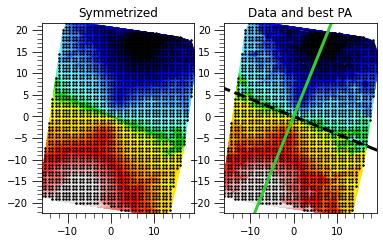

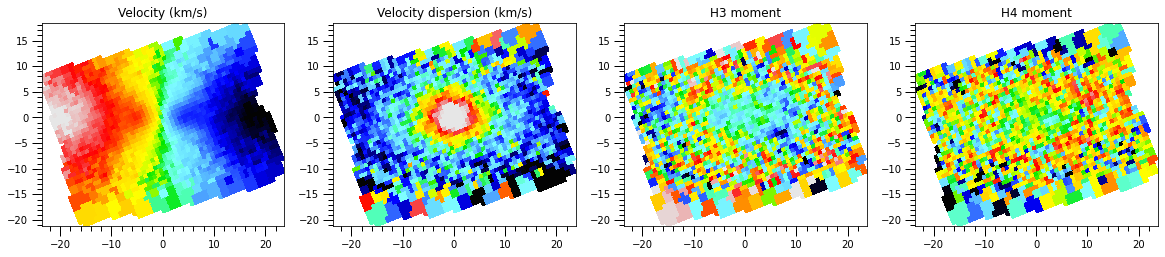

In [2]:
from dynamite.data_prep.generate_kin_input import read_atlas3d

## input directory
in_dir = 'NGC4570_input/'

# for ATLAS3D we need two input files: original cube and kinematics cube
# the following ATLAS-3D data products are provided in this repository
in_files =[in_dir+'MS_NGC4570_r1_C2D.fits',
           in_dir+'NGC4570_4moments_ATLAS3d.fits']

# where to place the output
out_dir = 'NGC4570_input/dynamite_input/'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

read_atlas3d(in_files)
create_kin_input('NGC4570', in_files, out_dir, expr='', fit_PA=True, kin_input='ATLAS3D', ngh=6)

# add the PSF to the header of the kinematic file
gh = dyn.kinematics.GaussHermite()
gh.add_psf_to_datafile(sigma=[1.5],
                       weight=[1.0],
                       datafile=f'{out_dir}/gauss_hermite_kins.ecsv')


The directory `NGC4570_input/dynamite_input` should now contain the following files,

- gauss_hermite_kins.ecsv 
- aperture.dat            
- bins.dat

along with some diagnositc plots. Alongside an MGE, this would be ready to input into DYNAMITE.